In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.morphology
import statistics as stat

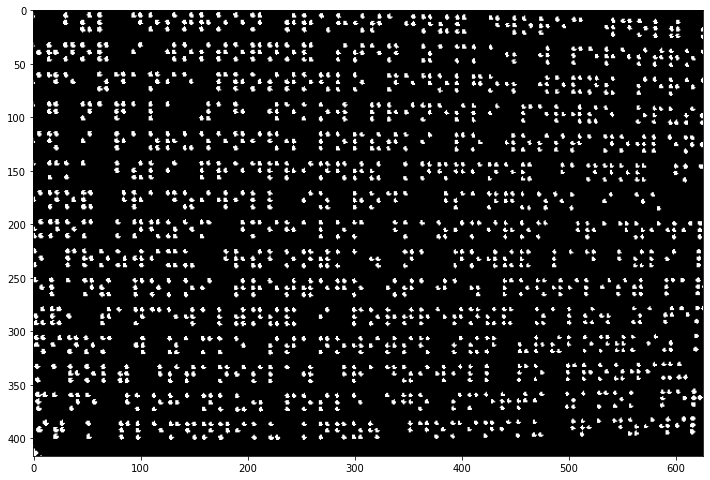

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/imagens/placa-braille-com-inscricoes.jpg", 0)
_ , img_bin = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
img_bin = (~img_bin)/255.
plt.figure(figsize=(12,12))
plt.imshow(img_bin, cmap='gray')

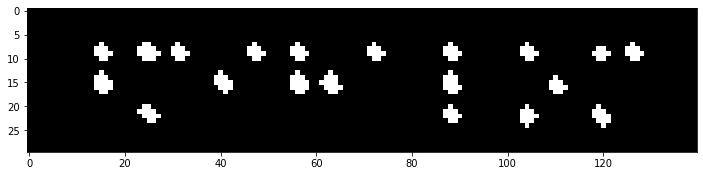

In [ ]:
img_test = img_bin[190:220, 180:320]
plt.figure(figsize=(12,12))

# Realizando erosão seguida de dilatação para separar pontos conectados
kernel = skimage.morphology.disk(1)
dst_img = cv2.erode( img_test, kernel, iterations = 1 )
dst_img = cv2.dilate( dst_img, kernel, iterations = 1 )

plt.imshow(dst_img, cmap='gray')

In [ ]:
def make_histogram_x(img):
    '''
    Organiza os dados da projeção vertical na imagem
    
    Entrada:
    img -> Array da imagem
    
    Saída:
    hist -> Array com os valores do histograma de projeção vertical
    '''

    height, width = img.shape

    hist = np.zeros(width)
    for x in range(height):
        for y in range(width):
            if (img[x][y] == 1):
                hist[y] += 1
    
    return np.array(hist)

In [ ]:
def make_histogram_y(img):
    '''
    Organiza os dados da projeção horizontal na imagem
    
    Entrada:
    img -> Array da imagem
    
    Saída:
    hist -> Array com os valores do histograma de projeção horizontal
    '''

    height, width = img.shape

    hist = np.zeros(height)
    for x in range(height):
        for y in range(width):
            if (img[x][y] == 1):
                hist[x] += 1
    
    return np.array(hist)

In [ ]:
def get_delimiters(hist):
    delimiters = list()
    for i in range(1, len(hist)-1):
        if (hist[i] > 0) and (hist[i-1] == 0) and (hist[i+1] > 0):
            delimiters.append(i-1)
        if (hist[i] > 0) and (hist[i-1] > 0) and (hist[i+1] == 0):
            delimiters.append(i+1)
    return delimiters

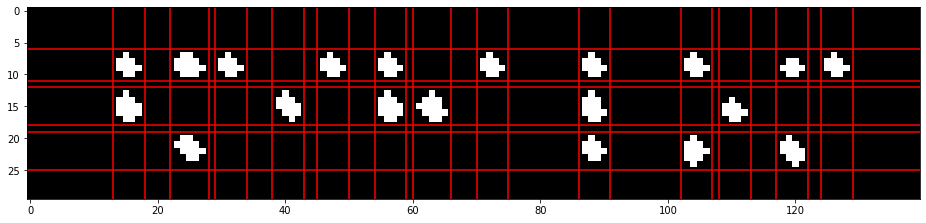

In [ ]:
hist_x = make_histogram_x(dst_img)
hist_y = make_histogram_y(dst_img)
delimiters_x = get_delimiters(hist_x)
delimiters_y = get_delimiters(hist_y)

plt.figure(figsize=(16,14))
plt.imshow(dst_img, cmap='gray')

for lx in delimiters_x:
    plt.axvline(lx, color='red')
for ly in delimiters_y:
    plt.axhline(ly, color='red')

In [ ]:
box_y_delimiters = [delimiters_y[0],delimiters_y[-1]]
distances = list()
for i in range(len(delimiters_x)-1):
    distances.append(delimiters_x[i+1] - delimiters_x[i])
    # print(f"{delimiters_x[i+1]} - {delimiters_x[i]}", end='\n')
print(distances)

[5, 4, 6, 1, 5, 4, 5, 2, 5, 4, 5, 1, 6, 4, 5, 11, 5, 11, 5, 1, 5, 4, 5, 2, 5]


In [ ]:
def get_box_x_delimiters(distances):
    distances = np.array(distances)

    min = distances.min()
    mode=stat.mode(distances)

    box_x_delimiters = list()
    for i in range(len(delimiters_x)-1):
        if (distances[i] <= min+1):
            diameter = delimiters_x[i] - delimiters_x[i-1]
            box_x_delimiters.append(delimiters_x[i] - diameter)
            box_x_delimiters.append(delimiters_x[i+1] + diameter)

        elif (distances[i] > mode+min):
            box_x_delimiters.append(delimiters_x[i] + min + mode)
            box_x_delimiters.append(delimiters_x[i-1])

        elif (i == 0 and distances[i] > min+1):
            box_x_delimiters.append(delimiters_x[i] + mode)
            box_x_delimiters.append(delimiters_x[i] - (mode+min))

    return box_x_delimiters

Coordenas em x dos delimitadores das boxes: [18, 7, 22, 35, 38, 50, 54, 65, 81, 70, 97, 86, 102, 113, 117, 129]


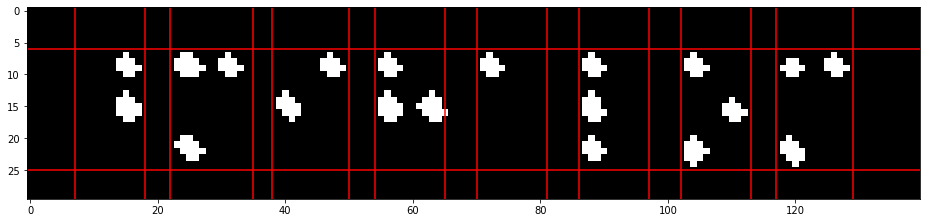

In [ ]:
box_x_delimiters = get_box_x_delimiters(distances)

print(f"Coordenas em x dos delimitadores das boxes: {box_x_delimiters}")

plt.figure(figsize=(16,14))
plt.imshow(dst_img, cmap='gray')

for lx in box_x_delimiters:
    plt.axvline(lx, color='red')
for ly in box_y_delimiters:
    plt.axhline(ly, color='red')

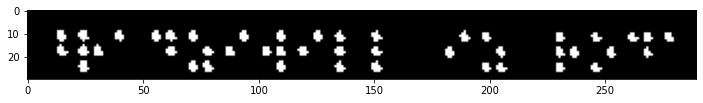

In [ ]:
# img_test = img_bin[220:250, 470:650]
img_test = img_bin[160:190, 70:360]
plt.figure(figsize=(12,12))

# Realizando erosão seguida de dilatação para separar pontos conectados
kernel = skimage.morphology.disk(1)
dst_img = cv2.erode( img_test, kernel, iterations = 1 )
dst_img = cv2.dilate( dst_img, kernel, iterations = 1 )

plt.imshow(img_test, cmap='gray')

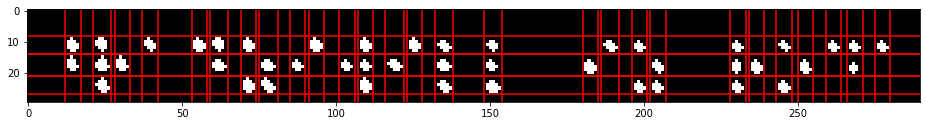

In [ ]:
hist_x = make_histogram_x(dst_img)
hist_y = make_histogram_y(dst_img)
delimiters_x = get_delimiters(hist_x)
delimiters_y = get_delimiters(hist_y)

plt.figure(figsize=(16,14))
plt.imshow(dst_img, cmap='gray')

for lx in delimiters_x:
    plt.axvline(lx, color='red')
for ly in delimiters_y:
    plt.axhline(ly, color='red')

In [ ]:
box_y_delimiters = [delimiters_y[0],delimiters_y[-1]]

In [ ]:
def get_box_x_delimiters(delimiters_x):

    distances = list()
    for i in range(len(delimiters_x)-1):
        distances.append(delimiters_x[i+1] - delimiters_x[i])
        # print(f"{delimiters_x[i+1]} - {delimiters_x[i]}", end='\n')
    distances = np.array(distances)

    min = distances.min()
    mode=stat.mode(distances)

    box_x_delimiters = list()
    for i in range(len(delimiters_x)-1):

        # Delimitando os caracters que possuem pontos nas duas colunas
        if (distances[i] <= min+1):
            diameter = delimiters_x[i] - delimiters_x[i-1]
            box_x_delimiters.append(delimiters_x[i] - diameter)
            box_x_delimiters.append(delimiters_x[i+1] + diameter)
            
        # Delimitando os caracteres de início e final de linha
        elif i == 0:
            # Caso em que o caractere possui pontos apenas na coluna da esquerda
            if (distances[i+1] > mode+min):
                box_x_delimiters.append(delimiters_x[i+1] + min + mode)
                box_x_delimiters.append(delimiters_x[i])
            # Caso em que o caractere possui pontos apenas na coluna da direita
            else:
                box_x_delimiters.append(delimiters_x[i] - min - mode)
                box_x_delimiters.append(delimiters_x[i+1])

        elif (i == len(distances)-1):
            # Caso em que o caractere possui pontos apenas na coluna da direita
            if (distances[i-1] > mode+min and distances[i-3] > min+1):
                box_x_delimiters.append(delimiters_x[i-1] - min - mode)
                box_x_delimiters.append(delimiters_x[i])
            # Caso em que o caractere possui pontos apenas na coluna da esquerda
            else:
                box_x_delimiters.append(delimiters_x[i+1] + min + mode)
                box_x_delimiters.append(delimiters_x[i])

        # Delimitando os caracteres que possuem pontos apenas na coluna da esquerda
        if (distances[i] > mode+min):
            if i > 1 and distances[i-2] > min+1:
                box_x_delimiters.append(delimiters_x[i] + min + mode)
                box_x_delimiters.append(delimiters_x[i-1])
        
        # Delimitando os caracteres que possuem pontos apenas na coluna da direita
        elif ((distances[i] > mode+min) and (i < len(delimiters_x)-3) and
            (distances[i+2] > min+1)):
            # if (i < len(delimiters_x)-3) and distances[i+2] > min+1:
                box_x_delimiters.append(delimiters_x[i+2])
                box_x_delimiters.append(delimiters_x[i+1] - min - mode)
            # elif i == len(delimiters_x)-2:
            #     box_x_delimiters.append(delimiters_x[i+2])
            #     box_x_delimiters.append(delimiters_x[i+1] - min - mode)

        # Delimitando os caracteres de espaço em branco
        if (distances[i] >= 3*mode+min):
            box_x_delimiters.append(delimiters_x[i] + mode)
            box_x_delimiters.append(delimiters_x[i+1] - mode)

    return box_x_delimiters

Coordenas em x dos delimitadores das boxes: [6, 17, 21, 34, 48, 37, 53, 64, 69, 80, 85, 96, 101, 112, 116, 129, 144, 132, 160, 148, 159, 175, 180, 191, 196, 207, 212, 223, 228, 239, 243, 255, 259, 271, 286, 275]


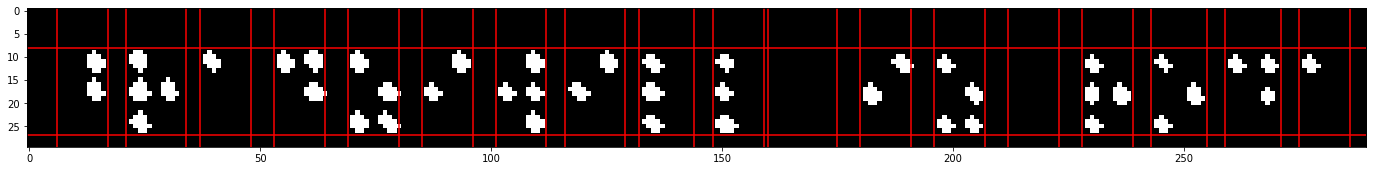

In [ ]:
box_x_delimiters = get_box_x_delimiters(delimiters_x)

print(f"Coordenas em x dos delimitadores das boxes: {box_x_delimiters}")

plt.figure(figsize=(24,18))
# plt.figure(figsize=(16,14))
plt.imshow(dst_img, cmap='gray')

for lx in box_x_delimiters:
    plt.axvline(lx, color='red')
for ly in box_y_delimiters:
    plt.axhline(ly, color='red')

In [ ]:
# Função que recebe uma imagem de texto braille e retorna subimagens com cada
# caractere da imagem
def get_subimages(img, x_delim, y_delim):

    x_delim = sorted(x_delim)
    y_delim = sorted(y_delim)
    subimages = list()
    for i in range(len(x_delim)//2):
        subimages.append(img[y_delim[0]:y_delim[1], x_delim[2*i]:x_delim[2*i+1]])
    return subimages

[6, 17, 21, 34, 37, 48, 53, 64, 69, 80, 85, 96, 101, 112, 116, 129, 132, 144, 148, 159, 160, 175, 180, 191, 196, 207, 212, 223, 228, 239, 243, 255, 259, 271, 275, 286]


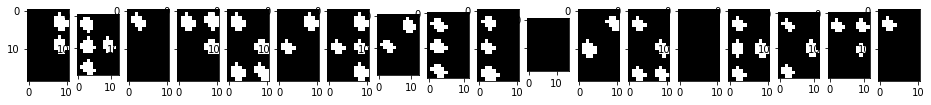

In [ ]:
subimages = get_subimages(dst_img, box_x_delimiters, box_y_delimiters)
fig, axs = plt.subplots(nrows=1, ncols=len(subimages), figsize=(16,14))
for i in range(len(subimages)):
    axs[i].imshow(subimages[i], cmap='gray')
print(sorted(box_x_delimiters))